In [1]:
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
from adjustText import adjust_text
#jtplot.style(theme='solarizedl')
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
import copy

In [5]:
def chart_artifact_distribution(keys: List[str], labels: List[str], artifacts: dict, rows: int, cols: int, name: str, colors: List[str] = None, label_data: bool = False):
    fig = plt.figure(figsize=(cols * 2, rows * 2))
    i = 1
    #cols += 1
    for r in range(rows):
        for c in range(cols):
            key = keys[i - 1]
            plt.subplot(rows, cols, i)
            if label_data:
                if colors is not None: plt.pie(artifacts[key], colors = colors, labels = labels)
                else: plt.pie(artifacts[key], labels = labels)
            else:
                if colors is not None: plt.pie(artifacts[key], colors = colors)
                else: plt.pie(artifacts[key])
            plt.title(key)
            i += 1
    #plt.legend(labels, loc = 'lower right')
    plt.subplot(rows, cols, 20)
    plt.legend(labels, loc='lower center', bbox_to_anchor=(1.15, -0.75),
          ncol=3, fancybox=True, shadow=True)
    plt.savefig(name, dpi=150)
    plt.show()

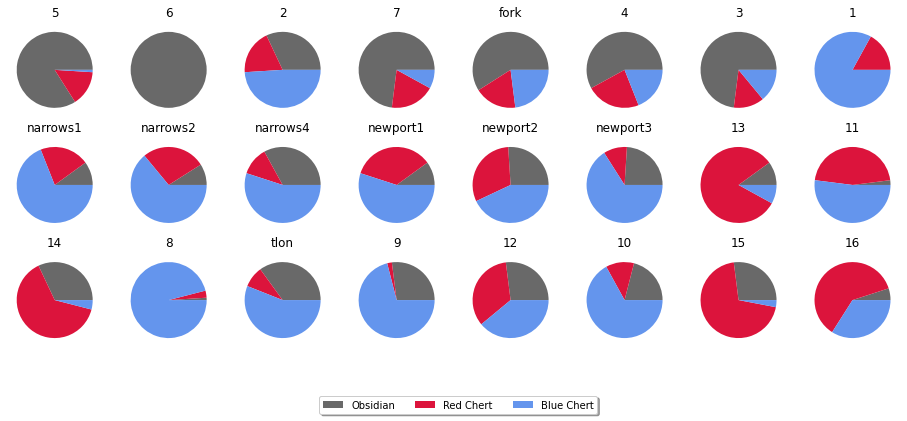

In [6]:
labels = ["Obsidian", "Red Chert", "Blue Chert"]
colors = ["dimgray", "crimson", "cornflowerblue"]
rows, cols = 3, 8
name = "east_west_lithics.png"
chart_artifact_distribution(east_west, labels, lithics, rows, cols, name, colors = colors)

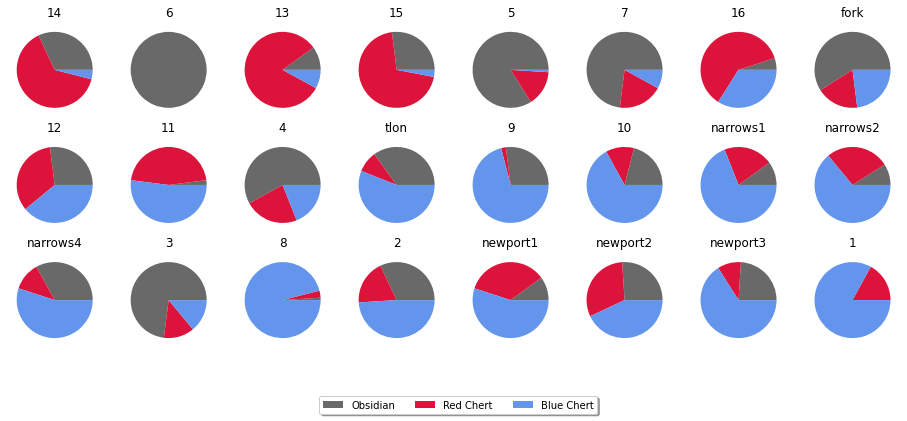

In [7]:
name = "north_south_lithics.png"
chart_artifact_distribution(north_south, labels, lithics, rows, cols, name, colors = colors)

In [8]:
for key in east_west:
    m = np.argmax(lithics[key])
    k = "{:<8}".format(key)
    print(f"{k}: {labels[m]}, {lithics[key][m]}")

5       : Obsidian, 84
6       : Obsidian, 100
2       : Blue Chert, 49
7       : Obsidian, 73
fork    : Obsidian, 59
4       : Obsidian, 58
3       : Obsidian, 73
1       : Blue Chert, 83
narrows1: Blue Chert, 69
narrows2: Blue Chert, 64
narrows4: Blue Chert, 55
newport1: Blue Chert, 55
newport2: Blue Chert, 43
newport3: Blue Chert, 66
13      : Red Chert, 82
11      : Blue Chert, 52
14      : Red Chert, 64
8       : Blue Chert, 96
tlon    : Blue Chert, 56
9       : Blue Chert, 71
12      : Blue Chert, 39
10      : Blue Chert, 67
15      : Red Chert, 70
16      : Red Chert, 61


In [9]:
for key in north_south:
    m = np.argmax(lithics[key])
    k = "{:<8}".format(key)
    print(f"{k}: {labels[m]}, {lithics[key][m]}")

14      : Red Chert, 64
6       : Obsidian, 100
13      : Red Chert, 82
15      : Red Chert, 70
5       : Obsidian, 84
7       : Obsidian, 73
16      : Red Chert, 61
fork    : Obsidian, 59
12      : Blue Chert, 39
11      : Blue Chert, 52
4       : Obsidian, 58
tlon    : Blue Chert, 56
9       : Blue Chert, 71
10      : Blue Chert, 67
narrows1: Blue Chert, 69
narrows2: Blue Chert, 64
narrows4: Blue Chert, 55
3       : Obsidian, 73
8       : Blue Chert, 96
2       : Blue Chert, 49
newport1: Blue Chert, 55
newport2: Blue Chert, 43
newport3: Blue Chert, 66
1       : Blue Chert, 83


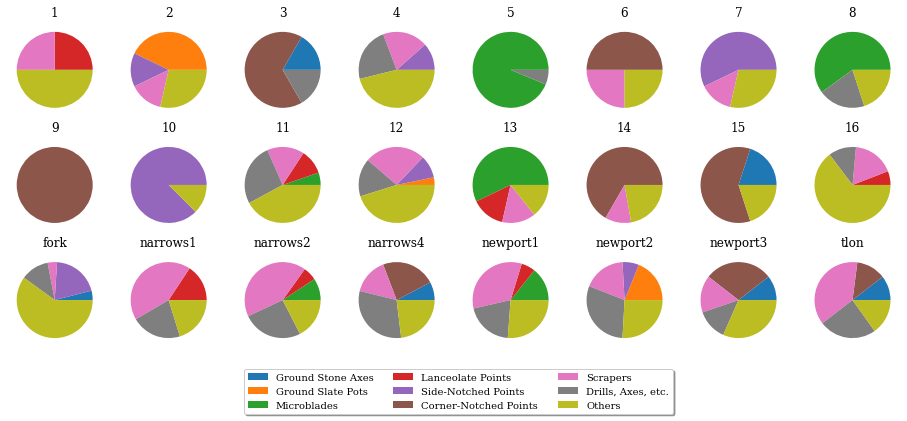

In [11]:
labels = ["Ground Stone Axes", "Ground Slate Pots", "Microblades", "Lanceolate Points", "Side-Notched Points", "Corner-Notched Points", 
          "Scrapers", "Drills, Axes, etc.", "Others"]
sites = []
for k, v in lithics.items():
    sites.append(k)

#colors = ["dimgray", "crimson", "cornflowerblue"]
rows, cols = 3, 8
name = "north_south_artifacts.png"
chart_artifact_distribution(sites, labels, artifacts, rows, cols, name)

In [28]:
artifact_data = np.zeros((len(artifacts), 9))
labels = []
for i, (k, v) in enumerate(artifacts.items()):
    artifact_data[i] = v / np.linalg.norm(v)
    labels.append(k)
pca = PCA(n_components = 2)
pcs = pca.fit_transform(artifact_data)
explained_variance = pca.explained_variance_ratio_

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
k = 3
artifact_clusters = KMeans(n_clusters=k, **kmeans_kwargs)
artifact_clusters.fit(artifact_data)
colors = ["tab:red", "tab:blue", "tab:green", "tab:red"]

In [29]:
a_lables

array([1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0], dtype=int64)

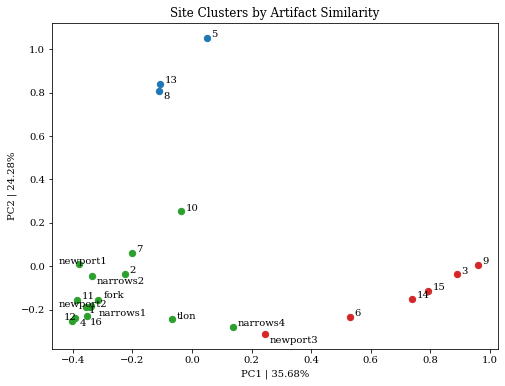

In [30]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.family':'serif'})
#plt.scatter(pcs[:, 0], pcs[:, 1], color = 'goldenrod')

annotations = []
for label, cluster, x, y in zip(labels, artifact_clusters.labels_, pcs[:, 0], pcs[:, 1]):
    plt.scatter(x, y, color = colors[cluster], s = 40)
    annotations.append(plt.annotate(label, xy=(x+0.015, y-0.005), xytext=(0, 0), textcoords='offset points'))
adjust_text(annotations)

plt.xlabel("PC1 | " + "{:.2%}".format(explained_variance[0]))
plt.ylabel("PC2 | " + "{:.2%}".format(explained_variance[1]))
plt.title("Site Clusters by Artifact Similarity")
plt.savefig('site_clustersk3.png', dpi=150)
plt.show()

In [32]:
lithics_data = np.zeros((len(lithics), 3))
labels = []
for i, (k, v) in enumerate(lithics.items()):
    lithics_data[i] = v
    labels.append(k)
pca = PCA(n_components = 2)
pcs = pca.fit_transform(lithics_data)
explained_variance = pca.explained_variance_ratio_

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
k = 3
lithic_clusters = KMeans(n_clusters=k, **kmeans_kwargs)
lithic_clusters.fit(lithics_data)
colors = ["tab:red", "tab:blue", "tab:green", "tab:red"]

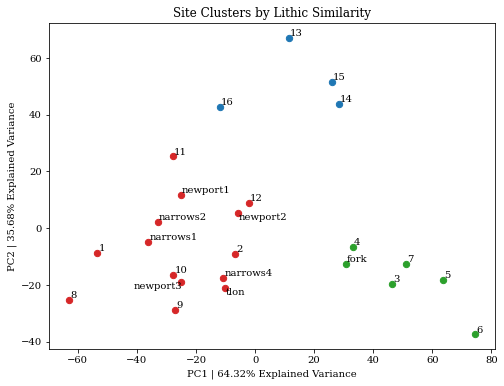

In [35]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.family':'serif'})
#plt.scatter(pcs[:, 0], pcs[:, 1], color = 'goldenrod')

annotations = []
for label, cluster, x, y in zip(labels, lithic_clusters.labels_, pcs[:, 0], pcs[:, 1]):
    plt.scatter(x, y, color = colors[cluster], s = 40)
    annotations.append(plt.annotate(label, xy=(x+0.345, y-0.005), xytext=(0, 0), textcoords='offset points'))
adjust_text(annotations)

plt.xlabel("PC1 | " + "{:.2%}".format(explained_variance[0]) + " Explained Variance")
plt.ylabel("PC2 | " + "{:.2%}".format(explained_variance[1]) + " Explained Variance")
plt.title("Site Clusters by Lithic Similarity")
plt.savefig('lithic_clusters.png', dpi=150)
plt.show()

In [14]:
def match_labels(truth: list, preds: list) -> list:
    """
    Matches the K-means labels to their 
    corresponding targets labels best on the 
    isomorphism that produces the most
    accurate outcome.
    
    """
    
    matched_preds = np.empty_like(preds)
    
    for k in np.unique(truth):
        match_nums = [np.sum((preds==k) * (truth==t)) for t in np.unique(truth)]
        matched_preds[preds==k] = np.unique(truth)[np.argmax(match_nums)]
        
    return matched_preds

In [15]:
print(lithic_clusters.labels_, artifact_clusters.labels_)
print(match_labels(lithic_clusters.labels_, artifact_clusters.labels_))

[0 0 2 2 2 2 2 0 0 0 0 0 1 1 1 1 2 0 0 0 0 0 0 0] [2 2 0 2 1 0 2 1 0 2 2 2 1 0 0 2 2 2 2 2 2 2 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
lithic_labels = lithic_clusters.labels_.copy()
artifact_labels = artifact_clusters.labels_.copy()
for i, l in enumerate(artifact_labels):
    if l == 2:
        artifact_labels[i] = 0
    elif l == 1:
        artifact_labels[i] = 2
    else:
        artifact_labels[i] = 1

In [17]:
print(lithic_labels, artifact_labels)

score = 0
for i in range(len(lithic_labels)):
    if lithic_labels[i] == artifact_labels[i]:
        #print(lithic_labels[i], artifact_labels[i]
        score += 1
print(score)

[0 0 2 2 2 2 2 0 0 0 0 0 1 1 1 1 2 0 0 0 0 0 0 0] [0 0 1 0 2 1 0 2 1 0 0 0 2 1 1 0 0 0 0 0 0 0 1 0]
14


In [4]:
lithics = {   # obsidian, red chert, blue chert
    "1"       : [0, 17, 83],
    "2"       : [32, 19, 49],
    "3"       : [73, 13, 14],
    "4"       : [58, 23, 19],
    "5"       : [84, 15, 1],
    "6"       : [100, 0, 0],
    "7"       : [73, 19, 8],
    "8"       : [1, 3, 96],
    "9"       : [27, 2, 71],
    "10"      : [21, 12, 67],
    "11"      : [2, 46, 52],
    "12"      : [27, 34, 39],
    "13"      : [10, 82, 8],
    "14"      : [32, 64, 4],
    "15"      : [27, 70, 3],
    "16"      : [5, 61, 34],
    "fork"    : [59, 18, 23],
    "narrows1": [10, 21, 69],
    "narrows2": [9, 27, 64],
    "narrows4": [33, 12, 55],
    "newport1": [10, 35, 55],
    "newport2": [26, 31, 43],
    "newport3": [24, 10, 66],
    "tlon"    : [35, 9, 56]
}

east_west =   ["5", "6", "2", "7", "fork", "4", "3", "1", "narrows1", "narrows2", "narrows4", "newport1", "newport2", "newport3", "13", "11", 
               "14", "8", "tlon", "9", "12", "10", "15", "16"]
north_south = ["14", "6", "13", "15", "5", "7", "16", "fork", "12", "11", "4", "tlon", "9", "10", "narrows1", "narrows2", "narrows4", "3", "8",
               "2", "newport1", "newport2", "newport3", "1"]

artifacts = {   # obsidian, red chert, blue chert
    "1"       : [0, 0, 0, 1, 0, 0, 1, 0, 2],
    "2"       : [0, 3, 0, 0, 1, 0, 1, 0, 2],
    "3"       : [1, 0, 0, 0, 0, 4, 0, 1, 0],
    "4"       : [0, 0, 0, 0, 3, 0, 5, 6, 12],
    "5"       : [0, 0, 15, 0, 0, 0, 0, 1, 0],
    "6"       : [0, 0, 0, 0, 0, 2, 1, 0, 1],
    "7"       : [0, 0, 0, 0, 4, 0, 1, 0, 2],
    "8"       : [0, 0, 3, 0, 0, 0, 0, 1, 1],
    "9"       : [0, 0, 0, 0, 0, 1, 0, 0, 0],
    "10"      : [0, 0, 0, 0, 7, 0, 0, 0, 1],
    "11"      : [0, 0, 1, 2, 0, 0, 3, 5, 8],
    "12"      : [0, 1, 0, 0, 3, 0, 8, 5, 14],
    "13"      : [0, 0, 4, 1, 0, 0, 1, 0, 1],
    "14"      : [0, 0, 0, 0, 0, 6, 1, 0, 2],
    "15"      : [1, 0, 0, 0, 0, 3, 0, 0, 1],
    "16"      : [0, 0, 0, 1, 0, 0, 3, 2, 11],
    "fork"    : [1, 0, 0, 0, 5, 0, 1, 3, 15],
    "narrows1": [0, 0, 0, 14, 0, 0, 38, 19, 18],
    "narrows2": [0, 0, 8, 5, 0, 0, 36, 22, 15],
#    "narrows3": [0, 3, 0, 0, 1, 0, 0, 0, 2],
    "narrows4": [1, 0, 0, 0, 0, 3, 2, 4, 3],
    "newport1": [0, 0, 12, 5, 0, 0, 28, 17, 22],
    "newport2": [0, 27, 0, 0, 10, 0, 26, 43, 37],
    "newport3": [4, 0, 0, 0, 0, 11, 6, 5, 12],
    "tlon"    : [36, 0, 0, 0, 0, 43, 129, 84, 52]
}

In [56]:
len(artifacts)

25